In [52]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
## We'll use the iris data set

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris['data'][:,(2,3)] # petal length and width
y = (iris['target']==2).astype(np.float64) # Iris Virginica or Else

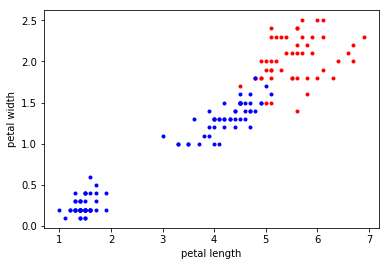

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X[(y==1.0)][:,0],X[(y==1.0)][:,1],'r.')
plt.plot(X[(y==0.0)][:,0],X[(y==0.0)][:,1],'b.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [20]:
# the data is clearly separable in this case

In [5]:
svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge')),
])

In [6]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [ ]:
## There is no probability output, however.

In [ ]:
# NonLinear SVM Classification

In [ ]:
## We try with the nonlinear moon data. We try a Polynomial Features Transformer

In [22]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X, y = make_moons(n_samples=100, noise=0.15)

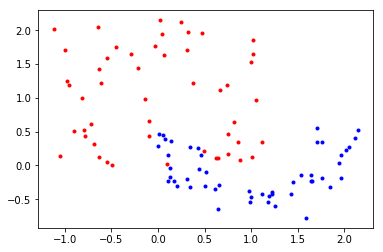

In [38]:
plt.plot(X[:,0][(y==1)],X[:,1][(y==1)],'b.')
plt.plot(X[:,0][(y==0)],X[:,0][(y==1)],'r.')

plt.show()

In [39]:
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

In [41]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [46]:
polynomial_svm_clf.predict([[2,0]]),polynomial_svm_clf.predict([[-0.5,1]])

(array([1]), array([0]))

In [ ]:
## We try a polynomial Kernel

In [47]:
from sklearn.svm import SVC

In [48]:
poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
])

In [49]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
## Gaussian RBF Kernel

In [50]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
])

In [51]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)